# Afnan Alharbi

### Importing libraries

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt
from sklearn import preprocessing

# Decision tree

### Play golf dataset

In [2]:
#importing the dataset
data = pd.read_csv("golf_df.csv")
data

,Play,Outlook,Temperature,Humidity,Wind
0,yes,rainy,cool,normal,False
1,no,rainy,cool,normal,True
2,yes,overcast,hot,high,False
3,no,sunny,mild,high,False
4,yes,rainy,cool,normal,False
5,yes,sunny,cool,normal,False
6,yes,rainy,cool,normal,False
7,yes,sunny,hot,normal,False
8,yes,overcast,mild,high,True
9,no,sunny,mild,high,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Play         10 non-null     object
 1   Outlook      10 non-null     object
 2   Temperature  10 non-null     object
 3   Humidity     10 non-null     object
 4   Wind         10 non-null     bool  
dtypes: bool(1), object(4)
memory usage: 458.0+ bytes


### Encoding

Why are we doing this step? the function <b>fit()</b> of the classifier does not accept data of the type 'object' (string), hence we must encode our string categories into numerical categories.


<b>There are several techniques to encode categorical data, some of them are:</b><br>

   <ol>
        <li>Using pandas.Series.cat.codes<br><b>How?</b><br>data['Outlook'] = data['Outlook'].astype('category').cat.codes
        <br>*Note: Using this technique requires the categorical data to be of ‘category’ data type, that's why we used astype() function to cast the pandas object's data type to ‘category’.</li><br>
    <li>Using sklearn.preprocessing.LabelEncoder<br><b>How?</b><br>from sklearn import preprocessing<br>le = preprocessing.LabelEncoder()<br>data['Outlook'] = le.fit_transform(data['Outlook'])</li>
   <ol>
    

In [4]:
#transforming ctegories
le_outlook = preprocessing.LabelEncoder()
le_outlook.fit(data['Outlook']) 
le_Temperature= preprocessing.LabelEncoder()
le_Temperature.fit(data['Temperature'])
le_Humidity= preprocessing.LabelEncoder()
le_Humidity.fit(data['Humidity']) 
le_wind = preprocessing.LabelEncoder()
le_wind.fit(data['Wind']) 

data['outlook_num'] = le_outlook.transform(data['Outlook']) 
data['Temperature_num'] = le_Temperature.transform(data['Temperature']) 
data['Humidity_num']= le_Humidity.transform(data['Humidity']) 
data['Wind_num']= le_wind.transform(data['Wind']) 

In [5]:
data

,Play,Outlook,Temperature,Humidity,Wind,outlook_num,Temperature_num,Humidity_num,Wind_num
0,yes,rainy,cool,normal,False,1,0,1,0
1,no,rainy,cool,normal,True,1,0,1,1
2,yes,overcast,hot,high,False,0,1,0,0
3,no,sunny,mild,high,False,2,2,0,0
4,yes,rainy,cool,normal,False,1,0,1,0
5,yes,sunny,cool,normal,False,2,0,1,0
6,yes,rainy,cool,normal,False,1,0,1,0
7,yes,sunny,hot,normal,False,2,1,1,0
8,yes,overcast,mild,high,True,0,2,0,1
9,no,sunny,mild,high,True,2,2,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Play             10 non-null     object
 1   Outlook          10 non-null     object
 2   Temperature      10 non-null     object
 3   Humidity         10 non-null     object
 4   Wind             10 non-null     bool  
 5   outlook_num      10 non-null     int32 
 6   Temperature_num  10 non-null     int32 
 7   Humidity_num     10 non-null     int32 
 8   Wind_num         10 non-null     int64 
dtypes: bool(1), int32(3), int64(1), object(4)
memory usage: 658.0+ bytes


### Splitting the dataset

In [7]:
# Determining features and target and splitting the dataset
X = data.iloc[:,5:9].values #features
y = data['Play'] #target

### Fitting the model 

In [8]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

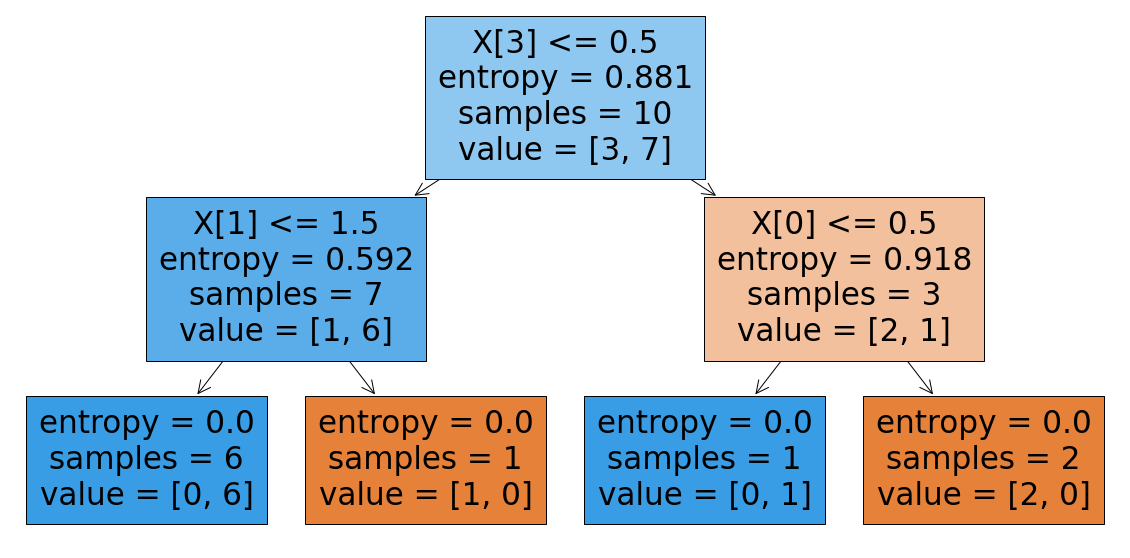

In [9]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf,filled=True)
plt.show()

### Making Prediction
Predict the class of: [ Outlook=“rainy”, Temperature=“mild”, Humidity=“high”, Wind=FALSE ]

In [10]:
# new example
newDay = ['rainy','mild', 'high',False]

In [11]:
# encode new example
newDay_encoded=[[le_outlook.transform([newDay[0]])[0],
le_Temperature.transform([newDay[1]])[0],
le_Humidity.transform([newDay[2]])[0],
le_wind.transform([newDay[3]])[0]]]

In [12]:
# make prediction
pred=clf.predict(newDay_encoded)

In [13]:
print("Play=",pred[0])

Play= no


# Naive Bayes 

### Employee dataset (CategoricalNB)

In [14]:
df = pd.read_csv("employee_data.csv") 
df

,Age,Income,Jobsatisfaction,Desire,Enrolls
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31 to 40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31 to 40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              15 non-null     object
 1   Income           15 non-null     object
 2   Jobsatisfaction  15 non-null     object
 3   Desire           15 non-null     object
 4   Enrolls          14 non-null     object
dtypes: object(5)
memory usage: 728.0+ bytes


### Encoding 

In [16]:
# convert  from  string categories to numerical category 
df['Age_num'] = df['Age'].astype('category').cat.codes 
df['Income_num'] = df['Income'].astype('category').cat.codes 
df['Jobsatisfaction_num'] = df['Jobsatisfaction'].astype('category').cat.codes 
df['Desire_num'] = df['Desire'].astype('category').cat.codes

In [17]:
df

,Age,Income,Jobsatisfaction,Desire,Enrolls,Age_num,Income_num,Jobsatisfaction_num,Desire_num
0,<=30,High,No,Fair,No,1,0,0,1
1,<=30,High,No,Excellent,No,1,0,0,0
2,31 to 40,High,No,Fair,Yes,0,0,0,1
3,>40,Medium,No,Fair,Yes,2,2,0,1
4,>40,Low,Yes,Fair,Yes,2,1,1,1
5,>40,Low,Yes,Excellent,No,2,1,1,0
6,31 to 40,Low,Yes,Excellent,Yes,0,1,1,0
7,<=30,Medium,No,Fair,No,1,2,0,1
8,<=30,Low,Yes,Fair,Yes,1,1,1,1
9,>40,Medium,Yes,Fair,Yes,2,2,1,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  15 non-null     object
 1   Income               15 non-null     object
 2   Jobsatisfaction      15 non-null     object
 3   Desire               15 non-null     object
 4   Enrolls              14 non-null     object
 5   Age_num              15 non-null     int8  
 6   Income_num           15 non-null     int8  
 7   Jobsatisfaction_num  15 non-null     int8  
 8   Desire_num           15 non-null     int8  
dtypes: int8(4), object(5)
memory usage: 788.0+ bytes


### Splitting the dataset

In [19]:
#Determining features and the target variable + Splitting the dataset
X_train = df.iloc[0:14, 5:9].values #features of training set
X_predict = df.iloc[14,5:9].values.reshape(1, -1)  #features of predict example
y_train = df.iloc[0:14,4].values #target of training set
y_predict = df.iloc[14,4]  #target of predict example

### Fitting the model 

In [20]:
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

### Making Prediction
Predict the class of: [ Age=“<=30”, Income=“Medium”, Jobsatisfaction =“Yes”, Desire="Fair" ]

In [21]:
y_predict=model.predict(X_predict) 

In [22]:
print("Enrolls?",y_predict[0])

Enrolls? Yes


In [23]:
model.predict_proba(X_predict)

array([[0.23217141, 0.76782859]])

### Extra Example: Water Potability dataset (GaussianNB)

dataset source: https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [24]:
#importing datset
df = pd.read_csv("water_potability.csv")
#getting info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Preprocessing

In [25]:
#looking at the noumber of nan vlaues
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [26]:
#replacing nan values with the mean
df['ph'].fillna(df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [28]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Splitting the dataset

In [29]:
#Determining the features variable and target variable 
X = df.drop(columns=['Potability']) #X=features
y = df['Potability'] #y=label/target

In [30]:
#X_train (training phase), X_test(test phase)
#y_train (training phase), y_test(test phase)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [31]:
# the shape of training and test sets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2620, 9) (656, 9)
(2620,) (656,)


### Fitting the model & Prediction

In [32]:
#Fitting
model = GaussianNB()
model.fit(X_train, y_train)
 
#Prediction
y_pred = model.predict(X_test)

### Results

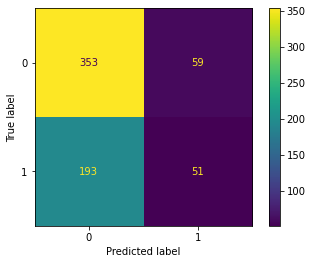

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))
disp.plot()
plt.show()

In [34]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy:  0.6158536585365854
Recall:  0.20901639344262296
Precision:  0.4636363636363636
F1 score:  0.28813559322033894


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       412
           1       0.46      0.21      0.29       244

    accuracy                           0.62       656
   macro avg       0.56      0.53      0.51       656
weighted avg       0.58      0.62      0.57       656



In [36]:
probs=model.predict_proba(X_test)

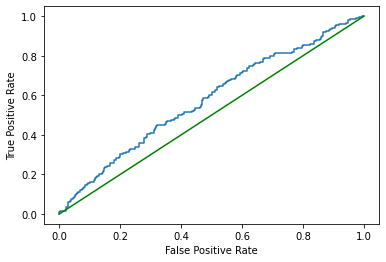

In [37]:
# display 
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], color = 'green')

In [38]:
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))

roc_auc_score:  0.5329062549737387


____________